# Predicting the Wine Quality

## Stages:
    1 Load the data-set.
    2 Find out the relation between dependent variables and independent variables.
    3 Split the train and test data set.
    4 Apply various classifiers to find out the accuracy on test data set.

In [1]:
#Import all required libraries


from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

%matplotlib inline

from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row
from bokeh.io import output_notebook
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

import warnings
warnings.filterwarnings('ignore')
output_notebook()
%matplotlib inline

Loading BokehJS ...

In [2]:
#Loading the dataset
url = "winequality-red.csv"
wine = pd.read_csv(url, sep=';')

### Exploring Data Set

In [3]:
#Check Dataset:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
"""From above we can see that minimun value of quality is 3 while maximum value is 8.
So now we will check the number of observations per quality value """

wine['quality'].value_counts().sort_index()


3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [7]:
print(wine.shape)

(1599, 12)


In [8]:
print(wine.columns)

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')


In [9]:
wine.rename(columns={'fixed acidity': 'fixedacidity','citric acid':'citricacid','volatile acidity':'volatileacidity','residual sugar':'residualsugar','free sulfur dioxide':'freesulfurdioxide','total sulfur dioxide':'totalsulfurdioxide'}, inplace=True)

In [10]:
print(wine.head())

   fixedacidity  volatileacidity  citricacid  residualsugar  chlorides  \
0           7.4             0.70        0.00            1.9      0.076   
1           7.8             0.88        0.00            2.6      0.098   
2           7.8             0.76        0.04            2.3      0.092   
3          11.2             0.28        0.56            1.9      0.075   
4           7.4             0.70        0.00            1.9      0.076   

   freesulfurdioxide  totalsulfurdioxide  density    pH  sulphates  alcohol  \
0               11.0                34.0   0.9978  3.51       0.56      9.4   
1               25.0                67.0   0.9968  3.20       0.68      9.8   
2               15.0                54.0   0.9970  3.26       0.65      9.8   
3               17.0                60.0   0.9980  3.16       0.58      9.8   
4               11.0                34.0   0.9978  3.51       0.56      9.4   

   quality  
0        5  
1        5  
2        5  
3        6  
4        5  


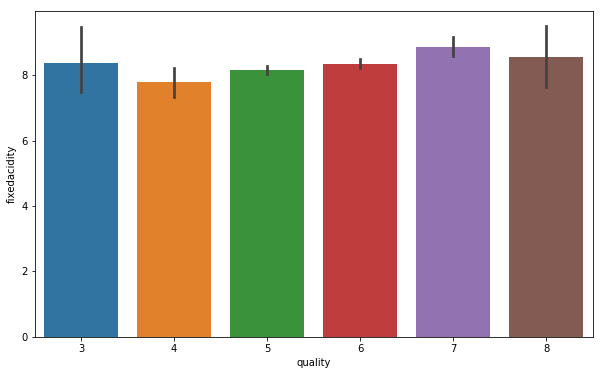

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixedacidity', data = wine)

In [12]:
quality_values = ['Good','Average','Better']
q_range = (2,5,7,8)

wine['rating'] = pd.cut(wine['quality'], bins = q_range, labels = quality_values)

In [13]:
print(wine.head())

   fixedacidity  volatileacidity  citricacid  residualsugar  chlorides  \
0           7.4             0.70        0.00            1.9      0.076   
1           7.8             0.88        0.00            2.6      0.098   
2           7.8             0.76        0.04            2.3      0.092   
3          11.2             0.28        0.56            1.9      0.075   
4           7.4             0.70        0.00            1.9      0.076   

   freesulfurdioxide  totalsulfurdioxide  density    pH  sulphates  alcohol  \
0               11.0                34.0   0.9978  3.51       0.56      9.4   
1               25.0                67.0   0.9968  3.20       0.68      9.8   
2               15.0                54.0   0.9970  3.26       0.65      9.8   
3               17.0                60.0   0.9980  3.16       0.58      9.8   
4               11.0                34.0   0.9978  3.51       0.56      9.4   

   quality   rating  
0        5     Good  
1        5     Good  
2        5    

In [14]:
wine.rating.value_counts().sort_index()

Good       744
Average    837
Better      18
Name: rating, dtype: int64

In [15]:
wine.groupby('rating').mean()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
Good,8.142204,0.589503,0.237755,2.542070,0.092989,16.567204,54.645161,0.997068,3.311653,0.618535,9.926478,4.901882
Average,8.472043,0.475239,0.297921,2.535066,0.082967,15.315412,39.479092,0.996494,3.311577,0.691004,10.828375,6.237754
Better,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444,8.000000


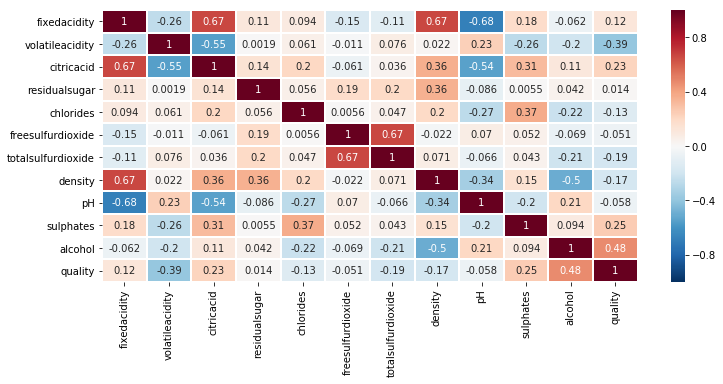

In [16]:
# Checking the corelation between the independant variable and dependant variables:
correlation = wine.corr()
plt.figure(figsize=(12, 5))

sns.heatmap(correlation,annot = True, linewidth = 1, vmin = -1, cmap ="RdBu_r")

In [17]:
correlation['quality'].sort_values(ascending=False)

quality               1.000000
alcohol               0.476166
sulphates             0.251397
citricacid            0.226373
fixedacidity          0.124052
residualsugar         0.013732
freesulfurdioxide    -0.050656
pH                   -0.057731
chlorides            -0.128907
density              -0.174919
totalsulfurdioxide   -0.185100
volatileacidity      -0.390558
Name: quality, dtype: float64

* It is observed that quality is mostly rely on alcohol,sulphates, citric acid, fixed acidity.
so we will only use those 4 columns for further analysis

In [18]:
for column in wine.columns:
    if wine[column].dtype == type(object):
        le = LabelEncoder()
        wine[column] = le.fit_transform(wine[column])

In [19]:
#One hot Encoding
label_encoder = LabelEncoder()
wine['rating'] = label_encoder.fit_transform(wine.rating)
print(wine['rating'].head())

0    2
1    2
2    2
3    0
4    2
Name: rating, dtype: int64


### Applying Algorithms

In [20]:
# Creating the X and y Values:
X = wine.drop('rating', axis =1)
y=wine['rating']

In [21]:
# Splitting train and test data sets:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3 , random_state = None)

In [22]:
#Standardizing the training data:
standardizer = StandardScaler()
standardizer.fit(X_train)
X_train = standardizer.transform(X_train)
X_test = standardizer.transform(X_test)

### 1. Classification using Logistic_Regression from sklearn

In [23]:
Log_reg = LogisticRegression()

In [24]:
#Fit the model and predict the X_test
Log_reg.fit(X_train, y_train)
pred_LR = Log_reg.predict(X_test)

In [25]:
#Print Classifiction Report:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       255
           1       0.00      0.00      0.00         7
           2       1.00      1.00      1.00       218

   micro avg       0.99      0.99      0.99       480
   macro avg       0.66      0.67      0.66       480
weighted avg       0.97      0.99      0.98       480



Using Logistic Regression, received an accuracy of 98%.

### 2. Classification using Random_Forest Classifier

In [26]:
RFClassifier = RandomForestClassifier()

In [27]:
#Fit and predict the model
RFClassifier.fit(X_train, y_train)
pred_RFC = RFClassifier.predict(X_test)

In [28]:
#Print Classification Report
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       255
           1       1.00      0.14      0.25         7
           2       1.00      1.00      1.00       218

   micro avg       0.99      0.99      0.99       480
   macro avg       0.99      0.71      0.75       480
weighted avg       0.99      0.99      0.98       480



Using Random Forest Classifier, received an accuracy of 99%.

### 3. Classification using Bernoulli Naive Bayes

In [29]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

In [30]:
# Fit and predict our model
bnb.fit(X_train,y_train)
pred_bnb = bnb.predict(X_test)

In [31]:
# Print Classification Report
print(classification_report(y_test, pred_bnb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       255
           1       0.00      0.00      0.00         7
           2       1.00      1.00      1.00       218

   micro avg       0.99      0.99      0.99       480
   macro avg       0.66      0.67      0.66       480
weighted avg       0.97      0.99      0.98       480



Using Bernoullis Naive Bayes Classifier, received an accuracy of 98%.

### 4. Classification using Support Vect Machine (Using SVC)

In [32]:
svc = SVC()

In [33]:
# Fit and Predict the model
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [34]:
# Print Classification Report
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       255
           1       1.00      0.29      0.44         7
           2       1.00      0.99      0.99       218

   micro avg       0.98      0.98      0.98       480
   macro avg       0.99      0.76      0.81       480
weighted avg       0.98      0.98      0.98       480



Using SVM Classifier, received an accuracy of 98%.

### 5. Classification Using SGD Classifier

In [35]:
sgd = SGDClassifier()

In [36]:
# Fit and Predict the model
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [37]:
# Print Classification Report
print(classification_report(y_test , pred_sgd))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       255
           1       0.00      0.00      0.00         7
           2       1.00      1.00      1.00       218

   micro avg       0.99      0.99      0.99       480
   macro avg       0.66      0.67      0.66       480
weighted avg       0.97      0.99      0.98       480



 Using SGD Classifier, received an accuracy of 98%.


# Final Observations:
 * Wine quality is ranging from min 1 to maximum of 10, while in data set, we have wine quality ranging from 3 to 8.
 * For simplification, we have classified wine quality in 3 classes as Good ( quality in 2-5), Average(quality in 5-7),Better (quality in 7-8).
 * Corelation map has given the effect of independant variables on the dependant variables.
 * From Corelation map we can say that quality of wine is mostly dependant on alcohol,sulphates, citric acid, fixed acidity.
 * Almost all the classifier (4 out of 5) has given accuracy of 98 %
 * With Random Forest classifier, we received accuracy of 99%.